# Getting Started with PyCBC

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from pycbc.waveform import get_td_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.detector import Detector

%matplotlib inline

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


### What types of waveforms can be generated?

In [2]:
# List of td approximants that are available
print(td_approximants())

# List of fd approximants that are currently available
print(fd_approximants())


['IMRPhenomD_NRTidal', 'TaylorF2', 'TaylorEt', 'SEOBNRv3_opt', 'IMRPhenomA', 'IMRPhenomC', 'IMRPhenomB', 'EOBNRv2', 'NRSur7dq2', 'SEOBNRv2_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SpinTaylorF2', 'IMRPhenomPv2_NRTidal', 'SpinTaylorF2_SWAPPER', 'SEOBNRv2_ROM_DoubleSpin_HI', 'EOBNRv2_ROM', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv4_opt', 'TaylorF2NL', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'NR_hdf5', 'TEOBResum_ROM', 'SEOBNRv4_ROM', 'SEOBNRv3_pert', 'EOBNRv2HM', 'SpinTaylorT4', 'TaylorT1', 'EOBNRv2HM_ROM', 'TaylorT3', 'TaylorT2', 'HGimri', 'TaylorT4', 'IMRPhenomD', 'IMRPhenomPv2', 'SEOBNRv4T', 'SEOBNRv2T', 'SEOBNRv1', 'SpinDominatedWf', 'SEOBNRv3', 'SEOBNRv2', 'SpinTaylorT1', 'SEOBNRv4', 'SpinTaylorT2', 'EccentricTD', 'SEOBNRv2_opt', 'SEOBNRv3_opt_rk4']
['IMRPhenomD_NRTidal', 'TaylorF2', 'TaylorF2Ecc', 'SEOBNRv2_ROM_EffectiveSpin', 'IMRPhenomA', 'IMRPhenomC', 'SEOBNRv1_ROM_EffectiveSpin', 'IMRPhenomD', 'SpinTaylorT2Fourier', 'IMRPhenomPv2_INTERP', 'SpinTaylor

So there are a lot of waveform options. We should probably figure out what the differences are at some point. Hopefully one of the above models is for a BNS system.

Following the [tutotial](https://pycbc.org/tutorials/3/3_WaveformMatchedFilter/), we will start with `SEOBNRv4_opt`, which is an effective one-body model for spinning binary black holes.

In [3]:
apx = 'SEOBNRv4_opt'
n_steps = 4096
hp, hc = get_td_waveform(approximant=apx,
                         mass1=10,
                         mass2=10,
                         spin1z=0.9,
                         spin2z=0.4,
                         inclination=1.23,
                         coa_phase=2.45,
                         delta_t=1.0/float(n_steps),
                         f_lower=40)


In [4]:
y = hp.data.tolist()
x = np.linspace(-1. * hp.duration, 0.0, len(y))

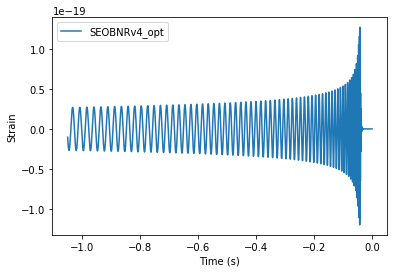

In [5]:
plt.plot(x, y, label=apx)
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()